In [1]:
# Install datasets library (if not already installed)
!pip install datasets
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
job_count = df.job_title_short.value_counts().sort_values(ascending =False)
job_count

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


# Notes
It is possible to plot things using Pandas. While it's more common to use a dedicated library like Matplotlib for graphing, you can use Pandas to create graphs. This is mostly used as a way to quickly create a graph for an analysis.

<Axes: xlabel='job_title_short'>

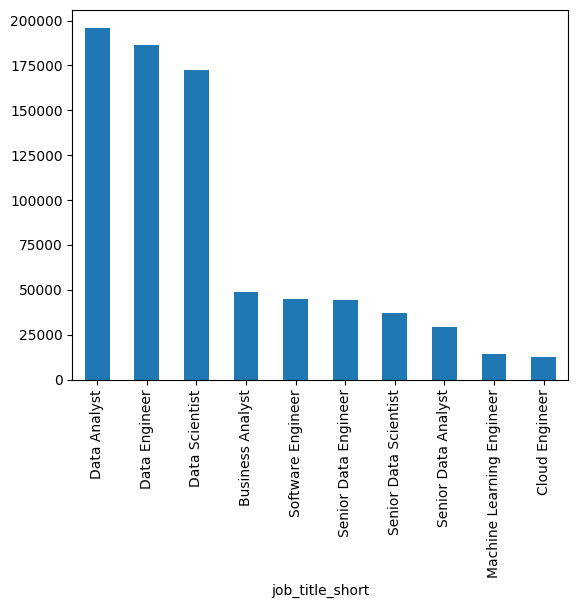

In [3]:
job_count.plot(kind='bar') # because it's a series i didn't need to specify the x , y
# and the x-axis isn't missed up completely like before

We can even customize all the labels just like we did in Matplotlib.

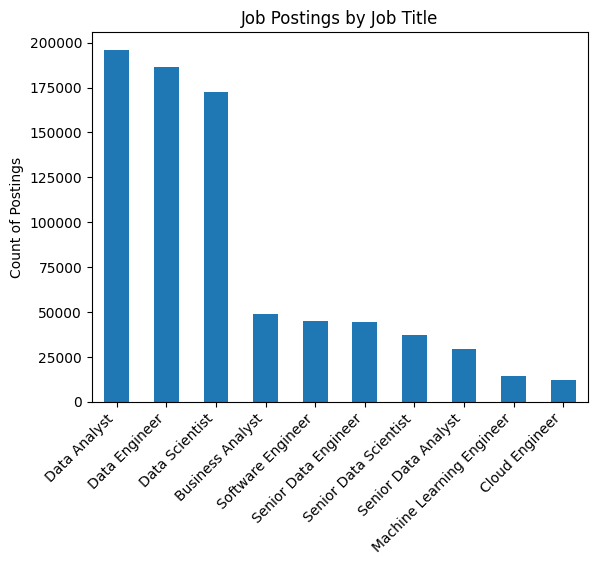

In [4]:
job_count.plot(kind='bar') # same code + adjustment
plt.xlabel('')
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting Dataframes with Pandas

In [5]:
df.groupby('job_title_short')['job_title_short'].count()

,job_title_short
job_title_short,
Business Analyst,49063
Cloud Engineer,12331
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Machine Learning Engineer,14080
Senior Data Analyst,29216
Senior Data Engineer,44563
Senior Data Scientist,36957


In [6]:
df.plot(x= 'job_title_short',y= job_count.values, kind = 'bar')

IndexError: index 196075 is out of bounds for axis 0 with size 17

<Axes: xlabel='job_posted_date'>

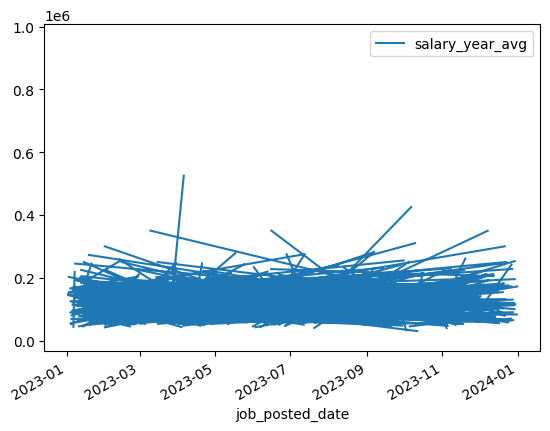

In [8]:
df.plot(x= 'job_posted_date', y= 'salary_year_avg', kind= 'line')

The problem with DataFrames (at least large ones) is the data still may need to be cleaned up.



In [11]:
# sort index by job posted date
df = df.set_index('job_posted_date')
df.sort_index(inplace=True)
df.head()
# lazy to clean it againg like the begining, so we can set df where the index is the job_posted_date and it's sorted

KeyError: "None of ['job_posted_date'] are in the columns"

In [14]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_posted_date,,,,,,,,,,,,,,,,
2023-01-01 00:00:04,Data Analyst,Data Analyst,"New York, NY",via CareerBuilder,Full-time,False,"New York, United States",False,False,United States,None,NaN,NaN,Metasys Technologies,"['sql', 'snowflake', 'visio', 'jira', 'conflue...","{'analyst_tools': ['visio'], 'async': ['jira',..."
2023-01-01 00:00:07,Data Analyst,Data Analyst,"Bloomfield, CT",via CareerBuilder,Full-time,False,"New York, United States",True,False,United States,None,NaN,NaN,Diverse Lynx,"['sql', 'sas', 'sas']","{'analyst_tools': ['sas'], 'programming': ['sq..."
2023-01-01 00:00:22,Data Analyst,Data Analyst,"Washington, DC",via CareerBuilder,Full-time,False,"New York, United States",False,True,United States,None,NaN,NaN,Guidehouse,"['sql', 'python', 'r', 'azure', 'snowflake', '...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."
2023-01-01 00:00:24,Data Analyst,Data Analyst,"Fairfax, VA",via CareerBuilder,Full-time,False,"New York, United States",False,False,United States,None,NaN,NaN,Protask,"['sql', 'jira']","{'async': ['jira'], 'programming': ['sql']}"
2023-01-01 00:00:27,Senior Data Analyst,Senior Data Analyst / Platform Experience,"Worcester, MA",via LinkedIn,Full-time,False,"New York, United States",False,True,United States,None,NaN,NaN,Atria Wealth Solutions,"['sql', 'atlassian', 'jira']","{'async': ['jira'], 'other': ['atlassian'], 'p..."


<Axes: xlabel='job_posted_date'>

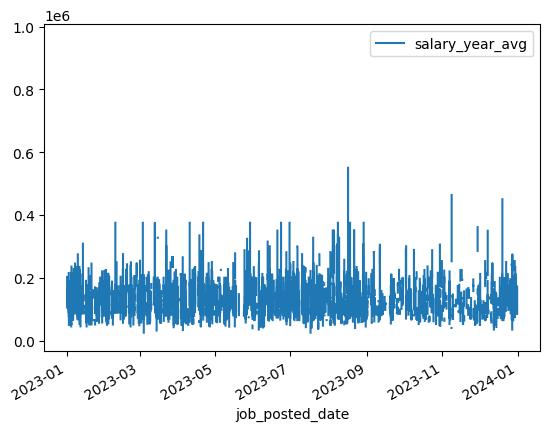

In [13]:
# then use the plotting again without the need to specify the x as it's the cleaned index by default
df.plot(y='salary_year_avg',kind='line')